# 挖掘建模

经过数据探索和数据预处理，得到了可以直接建模的数据。根据数据挖掘目标和数据形式可以建立分类与预测、聚类分析、关联分析、时序模式和偏差检测等模型，帮助企业提取数据中蕴含的商业价值，提高企业的竞争力。

## 分类与预测

分类和预测是预测问题的两种主要类型
- 分类主要是预测分类标号
- 预测主要是建立连续值函数模型，预测给定自变量对应的因变量的值

### 常见的分类与预测算法

- 回归分析
    - 线性回归
    - 非线性回归
    - Logistic回归
    - 岭回归
    - 主成分回归
    - 偏最小二乘回归
- 决策树
- 人工神经网络
- 贝叶斯网络
- 支持向量机

### 回归分析

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RandomizedLogisticRegression

In [22]:
# 导入数据集
filename = './data/data_5/bankloan.xls'
data = pd.read_excel(filename)

# 准备数据
X = data.drop('违约', axis=1).values
y = data['违约'].values

In [23]:
# 无特征选择的建模
lr = LogisticRegression(solver='liblinear').fit(X, y)
print('模型的平均正确率为：{}'.format(lr.score(X, y)))

模型的平均正确率为：0.8057142857142857


In [24]:
# 特征选择
features = data.columns[:-1].copy()
rlr = RandomizedLogisticRegression().fit(X, y)
print('特征得分为：{}'.format(rlr.scores_))
print('特征选择结果为：{}'.format(rlr.get_support()))
print('选择的有效特征为： {}'.format(features[rlr.get_support()].values))
X = data[features[rlr.get_support()]].values
print('特征选择后数据集的形状为：{}'.format(X.shape))

特征得分为：[0.07  0.06  0.99  0.435 0.    0.99  0.58  0.04 ]
特征选择结果为：[False False  True  True False  True  True False]
选择的有效特征为： ['工龄' '地址' '负债率' '信用卡负债']
特征选择后数据集的形状为：(700, 4)


In [25]:
# 特征选择后的建模
lr = LogisticRegression().fit(X, y)
print('模型的平均正确率为：{}'.format(lr.score(X, y)))

模型的平均正确率为：0.8142857142857143


特征选择方法：
- 递归特征消除
- 稳定性选择

**Logistic回归本质上是一种线性模型，这里的有效性检验本质上还是一种线性相关检验，因此筛选出来的变量只是与结果具有较强的线性相关性，变量没有被保留，也只是因为没有明显的线性相关性，但是可能存在一些非线性的关系，实际操作中需要根据问题的背景对筛选结果进行分析。**

对于非线性关系的变量筛选方法有决策树、神经网络等。

### 决策树

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
filename = './data/data_5/sales_data.xls'
data = pd.read_excel(filename, index_col='序号')

data[data == '好'] = 1
data[data == '是'] = 1
data[data == '高'] = 1
data[data != 1] = -1
data = data.astype(int)

X = data.drop('销量', axis=1).values
y = data['销量'].values

dtc = DecisionTreeClassifier(criterion='entropy').fit(X, y)

In [28]:
from sklearn.tree import export_graphviz

In [29]:
with open('./data/data_5/tree.dot', 'w') as f:
    f = export_graphviz(dtc, feature_names=data.columns[:-1].copy().values, out_file=f)

### 人工神经网络

In [30]:
filename = './data/data_5/sales_data.xls'
data = pd.read_excel(filename, index_col='序号')

data[data == '好'] = 1
data[data == '是'] = 1
data[data == '高'] = 1
data[data != 1] = -1
data = data.astype(int)

X = data.drop('销量', axis=1).values
y = data['销量'].values

In [31]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', class_mode='binary', metrics=['accuracy'])

model.fit(X, y, nb_epoch=10, batch_size=1000)
yp = model.predict_classes(X).reshape(len(y))

from sklearn.metrics import confusion_matrix
confusion_matrix(y, yp)

Epoch 1/10
34/34 [==============================] - 0s 8ms/step - loss: 0.9891 - acc: 0.2059
Epoch 2/10
34/34 [==============================] - 0s 59us/step - loss: 0.9855 - acc: 0.2059
Epoch 3/10
34/34 [==============================] - 0s 88us/step - loss: 0.9814 - acc: 0.2059
Epoch 4/10
34/34 [==============================] - 0s 88us/step - loss: 0.9770 - acc: 0.2059
Epoch 5/10
34/34 [==============================] - 0s 88us/step - loss: 0.9725 - acc: 0.2059
Epoch 6/10
34/34 [==============================] - 0s 59us/step - loss: 0.9677 - acc: 0.2059
Epoch 7/10
34/34 [==============================] - 0s 59us/step - loss: 0.9629 - acc: 0.2059
Epoch 8/10
34/34 [==============================] - 0s 88us/step - loss: 0.9580 - acc: 0.2059
Epoch 9/10
34/34 [==============================] - 0s 118us/step - loss: 0.9531 - acc: 0.2059
Epoch 10/10
34/34 [==============================] - 0s 59us/step - loss: 0.9483 - acc: 0.2059


array([[ 0,  3, 13],
       [ 0,  0,  0],
       [ 0, 11,  7]], dtype=int64)

### 分类与预测算法评价

- 绝对误差与相对误差
- 平均绝对误差
- 均方误差
- 均方根误差
- 平均绝对百分误差
- Kappa统计
- 识别准确率（accuracy）
- 识别精确率（Precision）
- 识别反馈率（Recall）
- ROC曲线（Sencitivity(Recall) - (1-Specificity)）
- 混淆矩阵

## 聚类分析

聚类的输入是一组未被标记的样本，聚类根据数据之间的距离或者相似度将其划分为若干组，划分的原则是组内距离最小化而组间距离最大化。

- K-Means
- K-中心点
- 系统聚类

### K-Means聚类算法

- 对于连续属性，要先对各属性值进行零-均值规范
- 对于文档数据间的相似度，使用余弦相似性
- 对于不同的聚类结果，选择误差平方和（各个点到所属簇中心点的距离平方和）较小的一个

In [32]:
inputfile = './data/data_5/consumption_data.xls'
k = 3
iteration = 500
data = pd.read_excel(inputfile, index_col='Id')
data_zc = 1.0 * (data - data.mean()) / data.std()

from sklearn.cluster import KMeans

model = KMeans(n_clusters=k, max_iter=iteration).fit(data_zc)

In [33]:
model.cluster_centers_

array([[-0.14935336, -0.65889299, -0.27177977],
       [ 3.45505486, -0.29565357,  0.44912342],
       [-0.16045063,  1.11480154,  0.39284443]])

In [34]:
model.labels_[:20]

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0])

In [35]:
data['类别'] = model.labels_
data.head()

,R,F,M,类别
Id,,,,
1,27,6,232.61,0
2,3,5,1507.11,0
3,4,16,817.62,2
4,3,11,232.81,0
5,14,7,1913.05,0


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

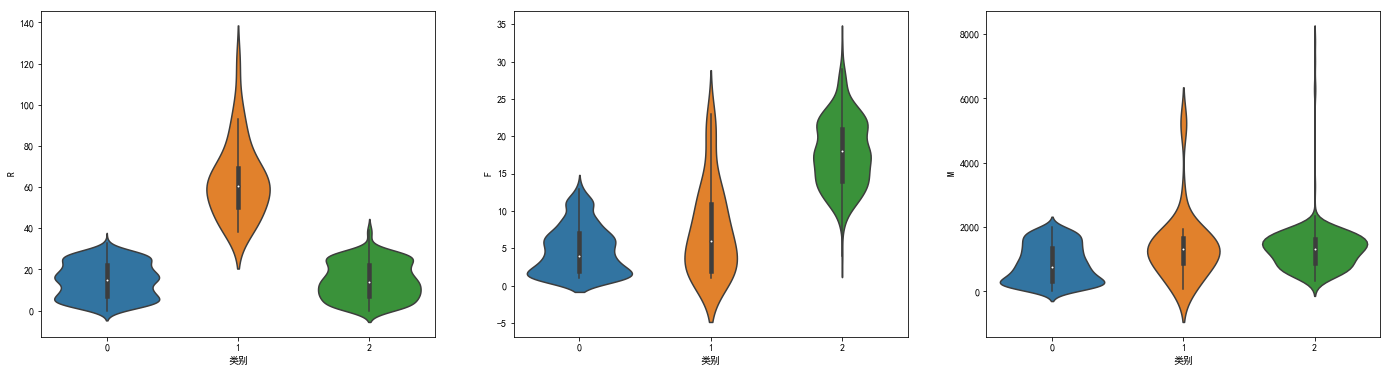

In [37]:
plt.figure(figsize=(24, 6))
for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.violinplot(data=data, y=data.columns[i], x='类别')

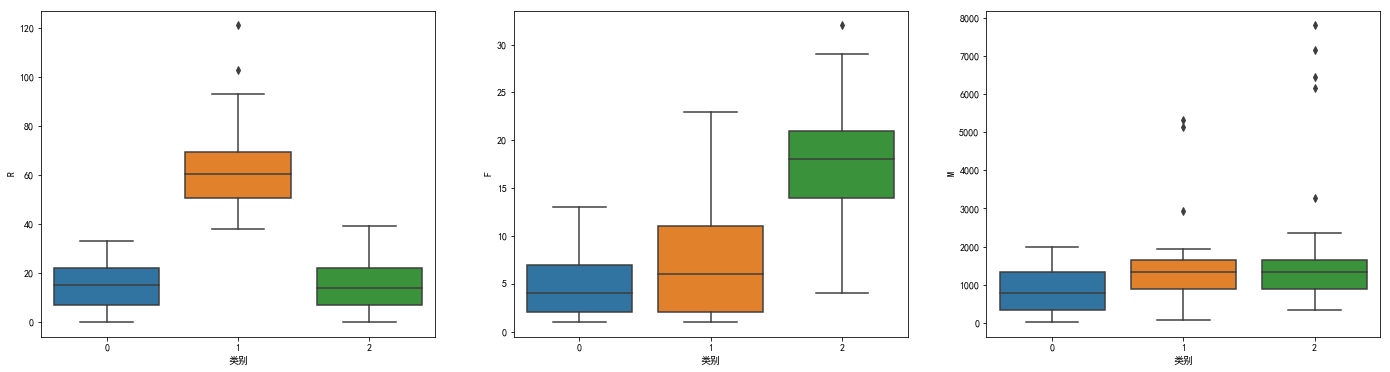

In [38]:
plt.figure(figsize=(24, 6))
for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=data, y=data.columns[i], x='类别')

### 聚类分析算法评价

- purity评价法
- RI评价法
- F值评价法

### Python主要聚类分析算法

sklearn.cluster
- KMeans：K均值聚类
- AffinityPropagation：吸引力传播聚类，几乎优于所有其他方法，不需要指定聚类数，但是运行效率低
- MeanShift：均值漂移聚类算法
- SpectralClustering：谱聚类，效果比K均值好，速度比K均值快
- AgglomerativeClustering：层次聚类，给出一棵聚类层次树
- DBSCAN：具有噪声的基于密度的聚类方法
- BIRCH：综合的层次聚类算法，可以处理大规模数据的聚类

### TSNE - 聚类结果可视化工具

In [41]:
from sklearn.manifold import TSNE

In [ ]:
TSNE()